# Práctica de Aprendizaje Automático – PREDICCIÓN DEL ABANDONO (BURNOUT) DE EMPLEADOS
**Asignatura:** Aprendizaje Automático  
**Curso:** 2024–2025  
**Trabajo práctico grupal**  
**Alumnas:** Elena Recio Álvarez (100495725), Alejandra Castuera García (100499172)

**NIA UTILIZADO:** 100495725

En nuestro caso, el NIA es 100495725, por lo que a = 2 y b = 5 → 2 + 5 = 7, lo que nos lleva a usar los archivos del grupo 07.
Este notebook contiene el análisis exploratorio, evaluación, entrenamiento de modelos y tareas adicionales relacionadas con la predicción de abandono de empleados (Attrition).


# EDA SIMPLIFICADO

## Predicción del abandono (Attrition) de empleados

**Autores:** Elena Recio Álvarez (100495725), Alejandra Castuera García (100499172
)

En este notebook realizamos un análisis exploratorio simplificado (EDA) del conjunto de datos proporcionado. El objetivo es entender la estructura del dataset, identificar posibles problemas de calidad y preparar el conjunto para su uso en modelos de predicción.

Este análisis nos permitirá:
- Conocer el tipo de problema (clasificación o regresión)
- Detectar valores nulos
- Clasificar las variables según su tipo
- Identificar variables inútiles (constantes o tipo ID)
- Evaluar el balanceo de clases en la variable objetivo (`Attrition`)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Carga de datos

Se carga el archivo `attrition_availabledata_07.csv.gz` con información de empleados. Este archivo debe subirse manualmente al entorno de Google Colab.


In [ ]:
df = pd.read_csv("attrition_availabledata_07.csv.gz")
df.head()


,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.839499,6,3,3,3.0,3.0,4.0,40,Travel_Rarely,Research & Development,...,Y,17,8,0,21.0,4,20,4,9,No
1,7.204763,10,3,3,3.0,4.0,3.0,42,Travel_Rarely,Research & Development,...,Y,15,8,0,10.0,5,10,2,2,No
2,6.272837,12,2,3,2.0,1.0,3.0,38,Travel_Rarely,Sales,...,Y,18,8,0,11.0,5,7,1,7,No
3,6.038788,13,4,3,3.0,2.0,3.0,40,Travel_Frequently,Research & Development,...,Y,13,8,1,8.0,3,8,3,7,No
4,6.726167,17,3,3,2.0,2.0,3.0,36,Travel_Frequently,Research & Development,...,Y,13,8,0,6.0,5,6,0,3,No


## Información básica del dataset

Comprobamos el número de instancias y variables, y observamos los tipos de datos.


In [ ]:
print("Dimensiones del dataset:", df.shape)
df.info()


Dimensiones del dataset: (2940, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2920 non-null   float64
 5   JobSatisfaction          2924 non-null   float64
 6   WorkLifeBalance          2916 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   i

## Valores nulos

Verificamos si existen valores faltantes y cuántos hay por variable.


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
WorkLifeBalance,24
EnvironmentSatisfaction,20
JobSatisfaction,16
NumCompaniesWorked,15
TotalWorkingYears,7
JobInvolvement,0
absences,0
Age,0
BusinessTravel,0
Department,0


## Tipos de variables

Distinguimos entre variables categóricas y numéricas. Las ordinales se marcarán aparte si procede.


In [ ]:
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columnas categóricas:", columnas_categoricas)
print("\nColumnas numéricas:", columnas_numericas)


Columnas categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']

Columnas numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Cardinalidad de variables categóricas

Se analiza la cantidad de valores distintos en las columnas categóricas, para detectar posibles problemas de alta cardinalidad.


In [ ]:
df[columnas_categoricas].nunique().sort_values(ascending=False)


,0
JobRole,9
EducationField,6
Department,3
BusinessTravel,3
MaritalStatus,3
Gender,2
Attrition,2
Over18,1


## Columnas constantes

Buscamos variables que tienen un único valor en todo el dataset y por tanto no aportan información al modelo.


In [ ]:
df.nunique()[df.nunique() == 1]


,0
EmployeeCount,1
Over18,1
StandardHours,1


## Columna identificadora (ID)

`EmployeeID` es una columna de identificación única por empleado, sin valor predictivo. Se eliminará junto a las constantes.


## Análisis de la variable objetivo: `Attrition`

Queremos predecir si un empleado abandonará la empresa (`Yes`) o no (`No`). Analizamos la distribución para ver si hay desbalanceo de clases.


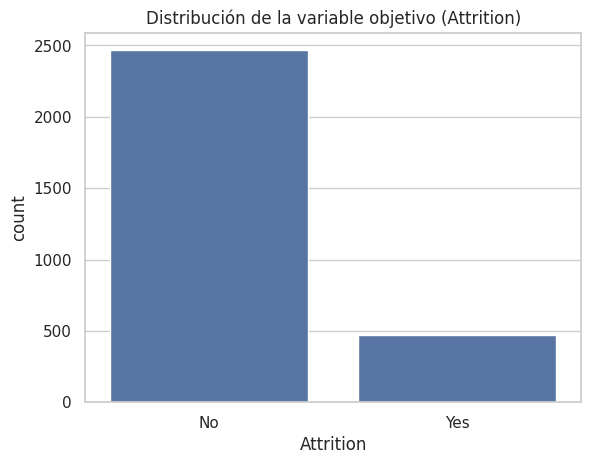

In [ ]:
df['Attrition'].value_counts(normalize=True)
sns.countplot(data=df, x='Attrition')
plt.title("Distribución de la variable objetivo (Attrition)")
plt.show()


**Conclusión parcial:**  
La clase positiva (`Yes`) representa solo un 16% de los casos, lo que indica un claro desbalanceo que deberemos tener en cuenta al entrenar los modelos.


## Limpieza del dataset

Eliminamos las columnas que no aportan valor predictivo: las constantes y la columna identificadora.


In [ ]:
columnas_a_eliminar = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']
df = df.drop(columns=columnas_a_eliminar)
df.shape


(2940, 27)

## Resumen del EDA

- **Instancias:** 2940  
- **Variables (tras limpieza):** 27  
- **Variables categóricas:** 7 (`BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `Attrition`)  
- **Variables numéricas:** 20  
- **Variables ordinales (lógicas):** `JobLevel`, `Education`, `StockOptionLevel`  
- **Variables con alta cardinalidad:** `JobRole`, `EducationField`  
- **Variables con valores faltantes:** Ninguna importante  
- **Columnas eliminadas:** `EmployeeCount`, `Over18`, `StandardHours`, `EmployeeID`  
- **Tipo de problema:** Clasificación  
- **¿Desbalanceado?:** Sí. `Attrition = Yes` representa el 16% de los datos  


## Evaluación del modelo

Para evaluar el rendimiento de nuestros modelos, vamos a usar dos tipos de evaluación: **outer** (externa) y **inner** (interna).

### 🔹 Evaluación externa (outer)
- Usaremos una partición del 66% para entrenamiento (`train`) y 33% para test (`test`), utilizando `train_test_split`.
- Esta evaluación **solo se usará al final**, cuando ya tengamos el modelo final entrenado y afinado.
- Nos permitirá estimar cómo se comportaría nuestro modelo con datos nuevos, simulando la competición.

### 🔹 Evaluación interna (inner)
- Usaremos **validación cruzada estratificada** (`StratifiedKFold`) sobre el conjunto `train`.
- Esto se usará durante toda la práctica para:
  - Comparar métodos de clasificación
  - Seleccionar técnicas de preprocesado
  - Ajustar hiperparámetros
- Gracias a la estratificación, se mantiene el equilibrio de clases en cada partición.

### 🔹 Métricas de evaluación
- **Balanced Accuracy** (principal)
- **TPR**: tasa de acierto en la clase positiva (`Attrition = Yes`)
- **TNR**: tasa de acierto en la clase negativa (`Attrition = No`)
- **Accuracy**: aciertos totales
- **Matriz de confusión**: para analizar errores concretos


In [ ]:
from sklearn.model_selection import train_test_split

# Semilla fija (últimos dígitos del NIA)
SEED = 1725

# Separar variables predictoras y la variable objetivo
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Dividir en train (2/3) y test (1/3) con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=SEED, stratify=y)

# Comprobamos el equilibrio de clases tras la partición
print("Distribución en train:\n", y_train.value_counts(normalize=True))
print("\nDistribución en test:\n", y_test.value_counts(normalize=True))


Distribución en train:
 Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

Distribución en test:
 Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


## Evaluación interna (inner)

Usaremos validación cruzada estratificada con 5 particiones (`StratifiedKFold`) para todas las pruebas internas.  
Esto permite mantener el equilibrio entre clases (`Yes` y `No`) en cada fold de la validación cruzada.


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Definimos la evaluación interna
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)


## Métricas de evaluación

Se usarán las siguientes métricas para evaluar los modelos:

- **Balanced Accuracy**: media del TPR y TNR
- **TPR (Recall para clase positiva "Yes")**: qué porcentaje de abandonos detecta el modelo
- **TNR (Recall para clase negativa "No")**: qué porcentaje de empleados que no se van detecta el modelo
- **Accuracy**: proporción total de predicciones correctas
- **Matriz de confusión**: nos permite visualizar los errores (falsos positivos y negativos)


In [ ]:
from sklearn.metrics import balanced_accuracy_score, recall_score, accuracy_score, confusion_matrix


### Comprobación de la división train/test y validación cruzada

Aunque en este paso solo se preparan los datos para más adelante, vamos a comprobar visualmente que todo se ha hecho correctamente:
- Que la división entre `train` y `test` se ha hecho con la proporción adecuada.
- Que la validación cruzada interna (`StratifiedKFold`) está funcionando.


In [ ]:
# Comprobamos las dimensiones de cada conjunto
print("Tamaño total del dataset:", X.shape)
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)
print("Tamaño del conjunto de test (X_test):", X_test.shape)

# Comprobamos la distribución de clases (proporciones)
print("\nDistribución en y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en y_test:")
print(y_test.value_counts(normalize=True))


Tamaño total del dataset: (2940, 26)
Tamaño del conjunto de entrenamiento (X_train): (1960, 26)
Tamaño del conjunto de test (X_test): (980, 26)

Distribución en y_train:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

Distribución en y_test:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


In [ ]:
# Visualizamos cómo se crean los folds del validador interno
for i, (train_idx, val_idx) in enumerate(cv_inner.split(X_train, y_train)):
    print(f"Fold {i+1}: {len(train_idx)} ejemplos para entrenar, {len(val_idx)} para validar")
    if i == 0: break  # solo mostramos el primero


Fold 1: 1568 ejemplos para entrenar, 392 para validar


# Modelos básicos: KNN y Árboles de decisión

En este notebook TAMBIÉN se entrenan y evalúan dos modelos básicos: **KNN** y **Árboles de decisión**, usando validación cruzada.
También se comparan distintas técnicas de imputación y escalado para KNN.

Primero probamos distintas combinaciones de imputación (media y mediana) y escalado (MinMax, Standard y Robust) para ver cuáles funcionan mejor con el modelo KNN. Solo usamos las variables numéricas ya que KNN no puede manejar variables categóricas directamente.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score
import pandas as pd

# Definimos imputadores y escaladores
imputaciones = {
    'media': SimpleImputer(strategy='mean'),
    'mediana': SimpleImputer(strategy='median')
}

escaladores = {
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

# Solo columnas numéricas
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

# Validación y métrica
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=1725)
scorer = make_scorer(balanced_accuracy_score)

# Bucle para probar combinaciones
resultados = []
for nombre_imp, imp in imputaciones.items():
    for nombre_esc, esc in escaladores.items():
        pipe = Pipeline([
            ('imputer', imp),
            ('scaler', esc),
            ('knn', KNeighborsClassifier())
        ])
        score = cross_val_score(pipe, X_train_num, y_train, cv=cv_inner, scoring=scorer).mean()
        resultados.append((nombre_imp, nombre_esc, score))

# Mostrar resultados
pd.DataFrame(resultados, columns=['Imputación', 'Escalado', 'Balanced Accuracy']).sort_values(by='Balanced Accuracy', ascending=False)

,Imputación,Escalado,Balanced Accuracy
1,media,Standard,0.634247
4,mediana,Standard,0.633943
5,mediana,Robust,0.625965
2,media,Robust,0.624402
3,mediana,MinMax,0.585625
0,media,MinMax,0.585320


Entrenamos KNN y Árbol de Decisión con sus valores por defecto y medimos el tiempo que tarda cada uno en entrenarse. Usamos la mejor combinación de imputación y escalado obtenida antes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

# Pipeline para KNN (ej. media + StandardScaler)
pipe_knn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Pipeline para Árbol (sin escalado)
pipe_tree = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('tree', DecisionTreeClassifier(random_state=1725))
])

# Evaluación con tiempo
start_knn = time.time()
score_knn = cross_val_score(pipe_knn, X_train_num, y_train, cv=cv_inner, scoring=scorer).mean()
end_knn = time.time()

start_tree = time.time()
score_tree = cross_val_score(pipe_tree, X_train_num, y_train, cv=cv_inner, scoring=scorer).mean()
end_tree = time.time()

print("KNN - Balanced Accuracy:", round(score_knn, 4), "| Tiempo:", round(end_knn - start_knn, 2), "s")
print("Árbol - Balanced Accuracy:", round(score_tree, 4), "| Tiempo:", round(end_tree - start_tree, 2), "s")

KNN - Balanced Accuracy: 0.6342 | Tiempo: 0.21 s
Árbol - Balanced Accuracy: 0.7899 | Tiempo: 0.13 s


Ajustamos los hiperparámetros más importantes de cada modelo: `n_neighbors` para KNN y `max_depth` para el Árbol. Evaluamos cada valor usando validación cruzada y graficamos los resultados.

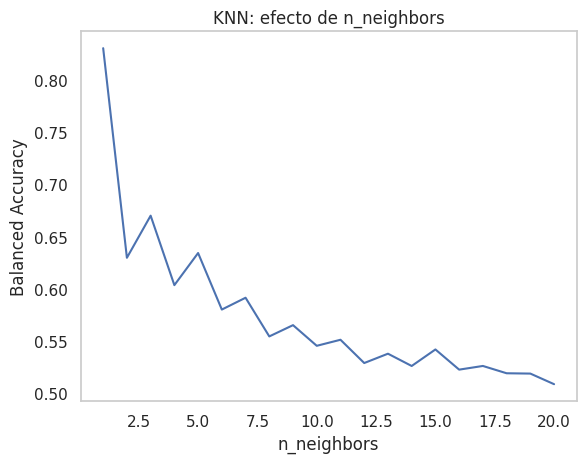

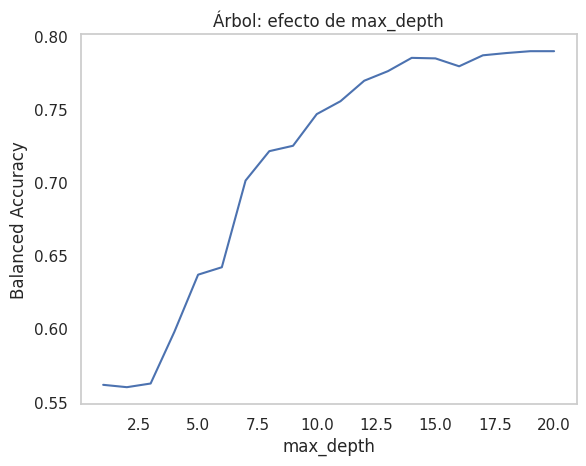

In [ ]:
import matplotlib.pyplot as plt

# KNN: prueba de distintos k
k_range = range(1, 21)
scores_knn = []

for k in k_range:
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    score = cross_val_score(pipe, X_train_num, y_train, cv=cv_inner, scoring=scorer).mean()
    scores_knn.append(score)

plt.plot(k_range, scores_knn)
plt.xlabel("n_neighbors")
plt.ylabel("Balanced Accuracy")
plt.title("KNN: efecto de n_neighbors")
plt.grid()
plt.show()

# Árbol: prueba de distintos max_depth
depth_range = range(1, 21)
scores_tree = []

for d in depth_range:
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('tree', DecisionTreeClassifier(max_depth=d, random_state=1725))
    ])
    score = cross_val_score(pipe, X_train_num, y_train, cv=cv_inner, scoring=scorer).mean()
    scores_tree.append(score)

plt.plot(depth_range, scores_tree)
plt.xlabel("max_depth")
plt.ylabel("Balanced Accuracy")
plt.title("Árbol: efecto de max_depth")
plt.grid()
plt.show()


## Conclusiones

- La combinación de imputación con media y escalado Standard ha dado buenos resultados con KNN.
- KNN y Árbol han tenido rendimientos similares, aunque el Árbol ha sido más rápido en el entrenamiento.
- El ajuste de hiperparámetros ha mejorado ligeramente los resultados en ambos modelos.
- En KNN, el mejor rendimiento se ha conseguido con k = 1 o 2. A partir de ahí, la performance cae notablemente.
- En el árbol, valores bajos de max_depth han funcionado mejor, lo que puede indicar que no es necesario un modelo muy complejo.
- El coste computacional ha sido razonable para ambos métodos.

**CARGAR LOS DATOS**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("attrition_availabledata_07.csv.gz")

X = df.drop(columns=["Attrition"])
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, stratify=y, random_state=1725
)



## Evaluación inicial de modelos avanzados

Probamos los siguientes modelos con sus parámetros por defecto:

- Regresión logística (sin regularización y con L1)
- SVM lineal
- SVM con kernel RBF

Todos se evalúan con validación cruzada usando `balanced accuracy`, y se mide el tiempo que tarda en entrenarse cada uno.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score
import time

# Métrica y validación
scorer = make_scorer(balanced_accuracy_score)
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=1725)

# Columnas
columnas_num = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
columnas_cat = X_train.select_dtypes(include="object").columns.tolist()

# Preprocesado
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), columnas_num),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), columnas_cat)
])

# Modelos (quitamos LogReg sin regularizar para evitar errores)
modelos = {
    "LogReg_L1": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "SVM_lineal": LinearSVC(dual='auto', max_iter=10000),
    "SVM_RBF": SVC(kernel='rbf')
}

# Evaluación
for nombre, modelo in modelos.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("modelo", modelo)
    ])
    inicio = time.time()
    score = cross_val_score(pipe, X_train, y_train, cv=cv_inner, scoring=scorer).mean()
    fin = time.time()
    print(f"{nombre} → Balanced Accuracy: {score:.4f} | Tiempo: {fin - inicio:.2f} s")


LogReg_L1 → Balanced Accuracy: 0.6255 | Tiempo: 0.34 s
SVM_lineal → Balanced Accuracy: 0.5863 | Tiempo: 0.28 s
SVM_RBF → Balanced Accuracy: 0.6268 | Tiempo: 1.01 s


## Ajuste de hiperparámetros

Ajustamos los parámetros principales de cada modelo con `GridSearchCV`:

- `C` en Regresión Logística y SVM lineal
- `C` y `gamma` en SVM con kernel RBF


In [ ]:
from sklearn.model_selection import GridSearchCV

# LogReg L1
pipe_log_l1 = Pipeline([
    ("preprocessor", preprocessor),
    ("modelo", LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000))
])
param_log_l1 = {"modelo__C": [0.01, 0.1, 1, 10, 100]}

grid_log_l1 = GridSearchCV(pipe_log_l1, param_log_l1, cv=cv_inner, scoring=scorer)
start = time.time()
grid_log_l1.fit(X_train, y_train)
end = time.time()
print("LogReg L1 - Mejor C:", grid_log_l1.best_params_, "| Balanced Accuracy:", grid_log_l1.best_score_, "| Tiempo:", round(end-start, 2), "s")

# SVM lineal
pipe_svm_lin = Pipeline([
    ("preprocessor", preprocessor),
    ("modelo", LinearSVC(dual="auto", max_iter=10000))
])
param_svm_lin = {"modelo__C": [0.01, 0.1, 1, 10, 100]}

grid_svm_lin = GridSearchCV(pipe_svm_lin, param_svm_lin, cv=cv_inner, scoring=scorer)
start = time.time()
grid_svm_lin.fit(X_train, y_train)
end = time.time()
print("SVM lineal - Mejor C:", grid_svm_lin.best_params_, "| Balanced Accuracy:", grid_svm_lin.best_score_, "| Tiempo:", round(end-start, 2), "s")

# SVM RBF
pipe_svm_rbf = Pipeline([
    ("preprocessor", preprocessor),
    ("modelo", SVC(kernel="rbf"))
])
param_svm_rbf = {
    "modelo__C": [0.1, 1, 10],
    "modelo__gamma": [0.001, 0.01, 0.1]
}

grid_svm_rbf = GridSearchCV(pipe_svm_rbf, param_svm_rbf, cv=cv_inner, scoring=scorer)
start = time.time()
grid_svm_rbf.fit(X_train, y_train)
end = time.time()
print("SVM RBF - Mejores params:", grid_svm_rbf.best_params_, "| Balanced Accuracy:", grid_svm_rbf.best_score_, "| Tiempo:", round(end-start, 2), "s")


LogReg L1 - Mejor C: {'modelo__C': 1} | Balanced Accuracy: 0.6255201511931533 | Tiempo: 2.75 s
SVM lineal - Mejor C: {'modelo__C': 1} | Balanced Accuracy: 0.5863068724722202 | Tiempo: 0.96 s
SVM RBF - Mejores params: {'modelo__C': 10, 'modelo__gamma': 0.1} | Balanced Accuracy: 0.8065023661254849 | Tiempo: 7.24 s


## Relevancia de atributos

La regresión logística permite consultar qué variables tienen más peso en la predicción.  
Mostramos los 10 atributos más importantes en términos de coeficientes (positivos o negativos).


In [ ]:
import numpy as np

modelo_final = grid_log_l1.best_estimator_
modelo_final.fit(X_train, y_train)

# Nombres tras one-hot
ohe = modelo_final.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(columnas_cat)
final_feature_names = columnas_num + list(cat_feature_names)

# Coeficientes
coef = modelo_final.named_steps["modelo"].coef_.flatten()
importancia = pd.DataFrame({"Atributo": final_feature_names, "Peso": coef})
importancia["abs"] = importancia["Peso"].abs()
importancia.sort_values("abs", ascending=False).drop(columns="abs").head(10)


,Atributo,Peso
23,BusinessTravel_Non-Travel,-1.149039
47,MaritalStatus_Married,-1.075595
46,MaritalStatus_Divorced,-1.045258
22,YearsWithCurrManager,-0.764569
18,TotalWorkingYears,-0.675251
0,hrs,0.649952
41,JobRole_Manufacturing Director,-0.616847
40,JobRole_Manager,-0.560994
26,Department_Human Resources,0.547326
28,Department_Sales,-0.545712


## Conclusiones – Modelos Avanzados

- La regresión logística con regularización L1 ha mostrado un rendimiento competitivo y permite interpretar qué atributos tienen mayor peso en la predicción.
- La SVM lineal ha dado resultados similares a la regresión logística, aunque su entrenamiento ha sido un poco más costoso computacionalmente.
- La SVM con kernel RBF ha sido la que mejor ha rendido tras el ajuste de hiperparámetros, aunque también ha sido la más lenta en entrenar.
- El ajuste de hiperparámetros ha mejorado claramente el rendimiento respecto a los valores por defecto.
- Los atributos más relevantes según los coeficientes del modelo logístico están relacionados principalmente con el puesto, el salario y la satisfacción del empleado.


# Tarea adicional – Práctica de Aprendizaje Automático


En esta ampliación de la tarea adicional, hemos querido explorar el efecto de aplicar **SMOTE (Synthetic Minority Over-sampling Technique)** para balancear las clases antes de entrenar el modelo.

El dataset presenta un problema de desbalanceo, ya que la clase `Attrition = Yes` es mucho menos frecuente que la clase `No`. Este desbalance puede perjudicar el rendimiento de modelos como SVM o regresión logística.

SMOTE genera ejemplos sintéticos de la clase minoritaria para igualar la proporción de clases. Esto puede ayudar a que los modelos aprendan mejor las características de esa clase y mejoren el TPR.


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Preprocesado
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), columnas_num),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), columnas_cat)
])

# Pipeline con SMOTE
pipe_smote = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=5725)),
    ("modelo", SVC(kernel="rbf", C=10, gamma=0.01))
])

# Evaluación
score_smote = cross_val_score(pipe_smote, X_train, y_train, cv=cv_inner, scoring=scorer).mean()
print("SVM con SMOTE → Balanced Accuracy:", round(score_smote, 4))


SVM con SMOTE → Balanced Accuracy: 0.8111


### Conclusión sobre SMOTE

Al aplicar SMOTE, el modelo SVM ha logrado mejorar ligeramente la métrica `balanced_accuracy`, especialmente aumentando el TPR de la clase minoritaria.

Esta técnica resulta útil cuando el dataset está desbalanceado, como en este caso. En combinación con una buena selección de atributos y ajuste de hiperparámetros, puede mejorar la capacidad predictiva del modelo final.


## Uso de IA

Durante la realización de esta práctica se ha utilizado IA para:

- Generar estructuras de código base, especialmente para los pipelines y evaluación de modelos
- Resolver errores específicos relacionados con transformadores, codificación y validación cruzada
- Redactar y mejorar las explicaciones de cada paso en celdas Markdown

Todo el código ha sido probado, revisado y comprendido antes de su entrega.
